<a href="https://colab.research.google.com/github/Avonna/Avona/blob/main/%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2_24_01_2023_SF_%D0%94%D0%B5%D0%BD%D1%8C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –ò–Ω—Ç–µ–Ω—Å–∏–≤ "–ü–∏—à–µ–º —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ç–µ–ª—å–Ω—É—é —Å–∏—Å—Ç–µ–º—É –∫–∞–∫ –≤ YouTube (–ø–æ—á—Ç–∏)"
## –î–µ–Ω—å 3

### –ó–∞–≥—Ä—É–∑–∏–º –∏ –æ–±—Ä–∞–±–æ—Ç–∞–µ–º –¥–∞–Ω–Ω—ã–µ

In [ ]:
import pandas as pd

data = pd.read_csv("./video_dataset.csv")

data_small = data.loc[:, ['id', 'title', 'description', 'thumbnail_medium', 'tags', 'views', 'likes']]

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
STOPWORDS = set(stopwords.words('english'))
MIN_WORDS = 4
MAX_WORDS = 200

PATTERN_S = re.compile("\'s")  # matches `'s` from text  
PATTERN_RN = re.compile("\\r\\n") #matches `\r` and `\n`
PATTERN_PUNC = re.compile(r"[^\w\s]") # matches all non 0-9 A-z whitespace 

def clean_text(text):
    text = text.lower()  
    # replace the matched string with ' '
    text = re.sub(PATTERN_S, ' ', text)
    text = re.sub(PATTERN_RN, ' ', text)
    text = re.sub(PATTERN_PUNC, ' ', text)
    return text

def tokenizer(sentence, min_words=MIN_WORDS, max_words=MAX_WORDS, stopwords=STOPWORDS, lemmatize=True):
    if lemmatize:
        stemmer = WordNetLemmatizer()
        tokens = [stemmer.lemmatize(w) for w in word_tokenize(sentence)]
    else:
        tokens = [w for w in word_tokenize(sentence)]
    token = [w for w in tokens if (len(w) > min_words and len(w) < max_words
                                                        and w not in stopwords)]
    return tokens 

def clean_sentences(df):
    print('Cleaning sentences...')
    df['clean_sentence'] = df['sentence'].apply(clean_text)
    df['tok_lem_sentence'] = df['clean_sentence'].apply(
        lambda x: tokenizer(x, min_words=MIN_WORDS, max_words=MAX_WORDS, stopwords=STOPWORDS))
    return df

from ast import literal_eval

data_small['tags_text'] = data_small['tags'].apply(lambda x: ' '.join(literal_eval(x)) if isinstance(x, str) else '')

def create_combined_data(x):
    result = x['description'] if isinstance(x['description'], str) else ''
    return result + ' ' + x['tags_text']

data_small['sentence'] = data_small.apply(create_combined_data, axis=1)
data_clean = clean_sentences(data_small)

Cleaning sentences...


### –°–¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω—É—é —Å–∏—Å—Ç–µ–º—É

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def extract_best_indices(m, topk, mask=None):
    if len(m.shape) > 1:
        cos_sim = np.mean(m, axis=0) 
    else: 
        cos_sim = m

    index = np.argsort(cos_sim)[::-1] 
    if mask is not None:
        assert mask.shape == m.shape
        mask = mask[index]
    else:
        mask = np.ones(len(cos_sim))
    mask = np.logical_or(cos_sim[index] != 0, mask) 
    best_index = index[mask][:topk]  
    return best_index

In [ ]:
import spacy

!python -m spacy download en_core_web_lg

In [ ]:
def predict_spacy(model, query_sentence, embed_mat, topk=3):
    query_embed = model(query_sentence)
    mat = np.array([query_embed.similarity(line) for line in embed_mat])

    mat_mask = np.array(
        [True if line.vector_norm else False for line in embed_mat])
    best_index = extract_best_indices(mat, topk=topk, mask=mat_mask)
    return best_index

In [ ]:
nlp = spacy.load("en_core_web_lg") 
data_clean['spacy_sentence'] = data_clean['sentence'].apply(lambda x: nlp(x))
embed_mat = data_clean['spacy_sentence'].values

In [ ]:
test_sentence = 'SQL with java' 
best_index = predict_spacy(nlp, test_sentence, embed_mat)

display(data_small[['title', 'sentence']].iloc[best_index]);

<ipython-input-67-b4f363494ea5>:3: UserWarning:

[W008] Evaluating Doc.similarity based on empty vectors.



title  \
163  Java Connect to Microsoft SQL Server Step by Step   
168  Java - Connection to SQL Server, downloading a...   
181        Java Connect to MySQL Database Step by Step   

                                              sentence  
163  Learn to write Java code that connects to Micr...  
168  This demo shows how to connect to SQL Server f...  
181  Learn to write Java code that connects to a My...

### –°–¥–µ–ª–∞–µ–º –∏–Ω—Ç–µ—Ä—Ñ–µ–π—Å —á—É—Ç—å —É–¥–æ–±–Ω–µ–µ –∏ –ø—Ä–∏—è—Ç–Ω–µ–µ

In [ ]:
def predict_top3(movie_id, data, model):
    test_sentence = data.iloc[movie_id]['clean_sentence']
    embed_mat = data['spacy_sentence'].values
    best_index = predict_spacy(nlp, test_sentence, embed_mat)
    return data.iloc[best_index]

In [ ]:
prediction = predict_top3(23, data_clean, nlp)

display(prediction)

<ipython-input-67-b4f363494ea5>:3: UserWarning:

[W008] Evaluating Doc.similarity based on empty vectors.



id                                            title  \
193  I6N5xf8NOz0               Backend development using Django 2   
16   f_uwKZIAeM0                        What is Machine Learning?   
131  b0L47BeklTE  Linear Regression Python Sklearn [FROM SCRATCH]   

                                           description  \
193  Course link:\nhttps://courses.learncodeonline....   
16   Machine learning is all around us; on our phon...   
131  linear regression python sklearn. In this vide...   

                                     thumbnail_medium  \
193  https://i.ytimg.com/vi/I6N5xf8NOz0/mqdefault.jpg   
16   https://i.ytimg.com/vi/f_uwKZIAeM0/mqdefault.jpg   
131  https://i.ytimg.com/vi/b0L47BeklTE/mqdefault.jpg   

                                                  tags     views   likes  \
193  ['Programming', 'LearnCodeOnline', 'Django', '...   42174.0   830.0   
16   ['machine learning', 'machienes', 'computer le...  451628.0  3180.0   
131  ['Linear Regression Sklearn Example', 'linear ...   60010.0   895.0   

                                             tags_text  \
193  Programming LearnCodeOnline Django Django 2 Ba...   
16   machine learning machienes computer learning c...   
131  Linear Regression Sklearn Example linear regre...   

                                              sentence  \
193  Course link:\nhttps://courses.learncodeonline....   
16   Machine learning is all around us; on our phon...   
131  linear regression python sklearn. In this vide...   

                                        clean_sentence  \
193  course link \nhttps   courses learncodeonline ...   
16   machine learning is all around us  on our phon...   
131  linear regression python sklearn  in this vide...   

                                      tok_lem_sentence  \
193  [course, link, http, course, learncodeonline, ...   
16   [machine, learning, is, all, around, u, on, ou...   
131  [linear, regression, python, sklearn, in, this...   

                                        spacy_sentence  
193  (Course, link, :, \n, https://courses.learncod...  
16   (Machine, learning, is, all, around, us, ;, on...  
131  (linear, regression, python, sklearn, ., In, t...

In [ ]:
from PIL import Image
import requests
from io import BytesIO

In [ ]:
def show_info(data, video_id):
    video = data.iloc[video_id]
    print("–û–ø–∏—Å–∞–Ω–∏–µ —Ñ–∏–ª—å–º–∞ —Å –Ω–æ–º–µ—Ä–æ–º", video_id)
    print(video['description'])
    response = requests.get(video['thumbnail_medium'])
    thumbnail = Image.open(BytesIO(response.content))
    display(thumbnail)

–û–ø–∏—Å–∞–Ω–∏–µ —Ñ–∏–ª—å–º–∞ —Å –Ω–æ–º–µ—Ä–æ–º 23
We haven't got time to label things, so can we let the computers work it out for themselves? Professor Uwe Aickelin explains supervised and un-supervised methods of machine learning.

Silicon Brain: 1,000,000 ARM Cores: https://youtu.be/2e06C-yUwlc 
Brian Kerninghan on Bell Labs: https://youtu.be/QFK6RG47bww
Could We Ban Encryption?: https://youtu.be/ShUyfk4QB-8 
Computer That Changed Everything - Altair 8800: https://youtu.be/6LYRgrqJgDc

http://www.facebook.com/computerphile
https://twitter.com/computer_phile

This video was filmed and edited by Sean Riley.

Computer Science at the University of Nottingham: http://bit.ly/nottscomputer

Computerphile is a sister project to Brady Haran's Numberphile. More at http://www.bradyharan.com


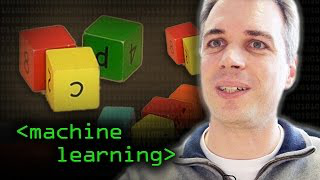

In [ ]:
show_info(data_clean, 23)

In [ ]:
def show_predictions(data, model):
    video_id = int(input())
    print("–í–•–û–î–ù–´–ï –î–ê–ù–ù–´–ï:")
    show_info(data, video_id)
    print("------------------\n\n")
    print("–ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–Ø")
    
    prediction = predict_top3(video_id, data, model)
    for i in range(3):
        show_info(data, list(prediction.index)[i])
        print('\n\n')

44
–í–•–û–î–ù–´–ï –î–ê–ù–ù–´–ï:
–û–ø–∏—Å–∞–Ω–∏–µ —Ñ–∏–ª—å–º–∞ —Å –Ω–æ–º–µ—Ä–æ–º 44
‚ùáÔ∏è LIVESTREAMS : https://www.twitch.tv/derekbanas 
‚ùáÔ∏è DISCORD : https://discord.gg/2dkDmpVvgD ( Contact Me Anytime )

MY UDEMY COURSES ARE 87.5% OFF TIL January 16th ($9.99) One is FREE

‚û°Ô∏è Python Data Science Series for $9.99 : Highest Rated & Largest Python Udemy Course + 56 Hrs + 200 Videos + Data Science https://bit.ly/Master_Python_44
‚û°Ô∏è C++ Programming Bootcamp Series for $9.99 : Over 23 Hrs + 53 Videos + Quizzes + Graded Assignments + New Videos Every Month https://bit.ly/C_Course_44
‚û°Ô∏è FREE 15 hour Golang Course!!! : https://bit.ly/go-tutorial5 (100 Available)

I LIVESTREAM CODE HERE : https://www.twitch.tv/derekbanas
MY DISCORD : https://discord.gg/VckHCAvA ( Contact Me Anytime )

Here is the Code : http://www.newthinktank.com/2019/10/c-tutorial-2019/

To celebrate my 1 Million subscribers I decided to update my most popular video! This is a 1,000 page book on C++ condensed d

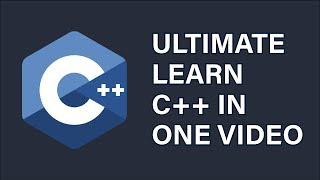

------------------


–ü–†–ï–î–°–ö–ê–ó–ê–ù–ò–Ø
–û–ø–∏—Å–∞–Ω–∏–µ —Ñ–∏–ª—å–º–∞ —Å –Ω–æ–º–µ—Ä–æ–º 53
I built a simple app with 10 different JavaScript frameworks... Learn the pros and cons of each JS framework before building your next app https://github.com/fireship-io/10-javascript-frameworks

#javascript #webdev #top10

üîó Resources

Full Courses https://fireship.io/courses/
Performance Benchmarks https://github.com/krausest/js-framework-benchmark
Source code https://github.com/fireship-io/10-javascript-frameworks

üìö Chapters

00:00 JavaScript Frameworks
00:53 1. Vanilla
04:21 2. React
07:48 3. Angular
10:15 4. Vue
12:18 5. Svelte
14:16 6. Lit
16:11 7. Stencil
17:18 8. Solid
18:35 9. Alpine
20:17 10. Mithril

 ü§ì Install the quiz app

iOS https://itunes.apple.com/us/app/fireship/id1462592372?mt=8
Android https://play.google.com/store/apps/details?id=io.fireship.quizapp

üî• Watch more with Fireship PRO

Upgrade to Fireship PRO at https://fireship.io/pro
Use code lORhwXd2 for 25%

<ipython-input-67-b4f363494ea5>:3: UserWarning:

[W008] Evaluating Doc.similarity based on empty vectors.



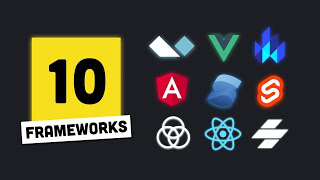




–û–ø–∏—Å–∞–Ω–∏–µ —Ñ–∏–ª—å–º–∞ —Å –Ω–æ–º–µ—Ä–æ–º 99
Visit  https://brilliant.org/KeithGalli/ to get started learning STEM for free, and the first 200 people will get 20% off their annual premium subscription

In this video we solve a series of Data Science Interview questions on Stratascratch. We start with easy problems using Python Pandas and then progressively get more difficult. At the end of the video we do five non-coding interview questions that force you to think at a high level.

Mentioned Resources!
Second Channel: https://www.youtube.com/c/techtrekbykeithgalli
Regex Cheat Sheet: https://cheatography.com/davechild/cheat-sheets/regular-expressions/
Probability text book: https://www.amazon.com/dp/188652923X/ref=cm_sw_em_r_mt_dp_3JSVKBY80FQ3EEDGSRD6

Here are the questions that we complete (in order)

~~ Coding ~~
1. Finding Updated Records: https://platform.stratascratch.com/coding/10299-finding-updated-records?code_type=2&via=keith
2. Number of Bathrooms and Bedrooms: https

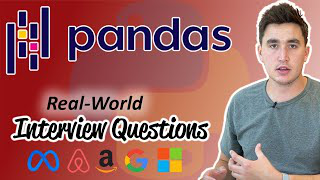




–û–ø–∏—Å–∞–Ω–∏–µ —Ñ–∏–ª—å–º–∞ —Å –Ω–æ–º–µ—Ä–æ–º 147
Learn how to run Multiple Linear Regression Analysis using Python from scratch! Learn the process of Machine Learning and all the tasks / steps you must undertake. Then, learn how to apply them using some dummy data and a Multiple Linear Regression Algorithm in Python using scikit (SKLearn) library.

Support the channel on Patreon:
https://www.patreon.com/data360yp 

Data Analytics Course Link: 
http://ipidata.teachable.com/ 

Part 1 Link: https://youtu.be/lfuJgQwY6Po
Part 2 Link: https://youtu.be/8_Le51miL-8
Part 3 Link: https://youtu.be/P-ePxiYlOMQ

How to Run Linear Regression in Python (2020) - Part 1

Tutorial Overview
Video 1:
1. What is Machine Learning?
2. Process of Machine Learning
3. Problem Formulation Phase
Video 2:
4. Loading the Raw Data
5. Data Preprocessing
‚Ä¢ EDA ‚Äì Exploratory Data ANalysis
‚Ä¢ Data Cleaning
‚Ä¢ Feature Selection
6. Splitting the Raw Data
Video 3:
7. What is Linear Regression Analysis
8. Runnin

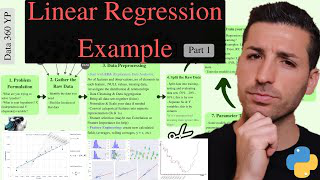

In [ ]:
show_predictions(data_clean, nlp)

### –°–¥–µ–ª–∞–µ–º –∏–Ω—Ç–µ—Ä—Ñ–µ–π—Å –æ—Ç–¥–µ–ª—å–Ω–æ –æ—Ç –Ω–æ—É—Ç–±—É–∫–∞

In [ ]:
!pip install jupyter-dash

In [ ]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, State, Output

app = JupyterDash(__name__)

app.layout = html.Div([
    html.Div(dcc.Input(id='input-on-submit', type='text')),
    html.Button('Submit', id='submit-val', n_clicks=0),
    html.Div(id='container-button-basic',
             children='Enter a value and press submit'),
])


@app.callback(
    Output('container-button-basic', 'children'),
    Input('submit-val', 'n_clicks'),
    State('input-on-submit', 'value')
)
def update_output(n_clicks, value):
    prediction = predict_top3(int(value), data_clean, nlp)

    output = []
    for i in range(3):
      output.append('–û–ø–∏—Å–∞–Ω–∏–µ –¥–ª—è –≤–∏–¥–µ–æ —Å –∏–Ω–¥–µ–∫—Å–æ–º: ')
      output.append(str(prediction.index[i]))
      output.append(html.Br())
      output.append(prediction.iloc[i]['description'])
      output.append(html.Br())
      output.append(html.Br())
      output.append(html.Br())

    return html.P(output)

app.run_server(host='0.0.0.0')

Dash app running on:


<IPython.core.display.Javascript object>